In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict
%matplotlib inline

In [61]:
def original_data_func(attack_type="random", x_axis="byzantines", dataset='mnist'):
    file_addr = attack_type + "_" + x_axis
    
    mnist_list = ['mnist', 'mnist.1','mnist.2','mnist.3','mnist.4','mnist.5',]
    fashion_list = ['fashion', 'fashion.1','fashion.2','fashion.3','fashion.4','fashion.5',]
    cifar_list = ['cifar', 'cifar.1', 'cifar.2', 'cifar.3', 'cifar.4', 'cifar.5', ]

    framework_list = ['Ensemble FL', 'FedAvg', 'FLPhish(τ=0.1)', 'FLPhish(τ=0.2)', 'FLPhish(τ=0.5)', 'FLPhish(weight)']
    byzantines_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    imbalances_list = [0.1,0.2,0.5,0.6,0.7,0.8]
    
    df = pd.read_csv("FLPhish_plots/"+file_addr+"/"+file_addr+".csv", sep="\t", index_col=0)
    df=df.dropna(axis=0)
    
    if(dataset=='mnist'):
        df = df[mnist_list]
    elif(dataset=='fashion'):
        df = df[fashion_list]
    elif(dataset=='cifar'):
        df = df[cifar_list]
    df.columns = framework_list
    return df

In [62]:
def sota_data_func(attack_type='random', x_axis="byzantines", dataset='mnist', defense_method = "Median"):
    
    folder_addr = "sota_data/"+defense_method+"/"+attack_type+"/"+dataset+"/"
    byzantines_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    
    accuracy_list = []
    if(x_axis=="byzantines"):
        for byzantine in byzantines_list:
            temp_df = pd.read_csv(folder_addr+str(byzantine)+".csv", index_col=0)
            if(byzantine==0.5):
                accuracy_val = temp_df.iloc[2,-1]
            else:
                accuracy_val = temp_df.iloc[0,-1]
            accuracy_list.append(accuracy_val)

    if(x_axis == "imbalances"):
        temp_df = pd.read_csv(folder_addr+"0.5.csv", index_col=0)
        accuracy_list = list(temp_df.iloc[:,-1])
    return accuracy_list

In [63]:
def all_data(attack_type="random", x_axis="byzantines", dataset='mnist'):
    original_data =  original_data_func(attack_type, x_axis, dataset)
    median_accuracy_list = sota_data_func(attack_type, x_axis, dataset, "Median")
    trimmed_accuracy_list = sota_data_func(attack_type, x_axis, dataset, "TrimmedMean")
    
    
    original_data['median']=median_accuracy_list
    original_data['trimmed mean']=trimmed_accuracy_list
    
    return original_data

In [190]:
def bar_plot(attack_type="random", x_axis="byzantines"):
    sns.set(font_scale =1.3)
    sns.set_style("whitegrid")
    #import matplotlib.pyplot as plt
    
    #plt.legend(fontsize=1)
    
    
    mnist_temp_df = all_data(attack_type, x_axis, "mnist").iloc[-1,:]
    fashion_temp_df = all_data(attack_type, x_axis, "fashion").iloc[-1,:]
    cifar_temp_df = all_data(attack_type, x_axis, "cifar").iloc[-1,:]
    
    framework_list = ['FedAvg', "median", "trimmed mean", 'Ensemble FL', 'FLPhish(τ=0.1)', 'FLPhish(τ=0.2)', 'FLPhish(τ=0.5)', 'FLPhish(weight)']*3
    accuracy_table = {}
    for framework in framework_list:
        accuracy_table[framework]=[]
        accuracy_table[framework].append(mnist_temp_df[framework])
        accuracy_table[framework].append(fashion_temp_df[framework])
        accuracy_table[framework].append(cifar_temp_df[framework])
    X = np.arange(3)
    fig = plt.figure()
    #添加子图区域
    
    ax = fig.add_axes([0,0,1,1])
    #绘制柱状图
    color_list = ['b', 'orange', 'g', 'tomato', 'royalblue', 'sandybrown','slategray', 'crimson']
    bar_list = []
    for framework in framework_list:
        framework_index = framework_list.index(framework)
        if(framework=="median"):
            legend_label = "Median"
        elif(framework=="trimmed mean"):
            legend_label = "Trimmed Mean"
        else:
            legend_label = framework
        ax.bar(X + 0.115*framework_index, accuracy_table[framework], color = color_list[framework_index], width = 0.1, label=legend_label)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=13)
    plt.xticks(np.arange(0.4, 3.4), ("MNIST", "Fashion-MNIST", "CIFAR-10"))
    plt.ylim(0, 100)
    #plot_fig = plot_fig.get_figure()
    plt.savefig("plots"+"/"+"bar_"+x_axis+"_"+ attack_type +"_bar.pdf",bbox_inches = 'tight')

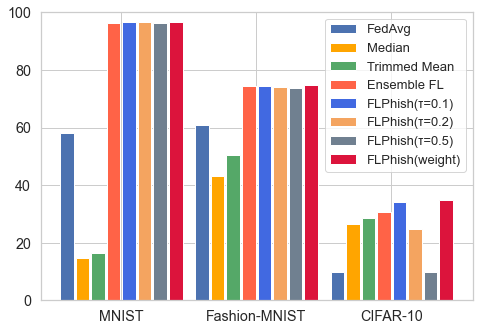

In [191]:
bar_plot('random', 'imbalances')

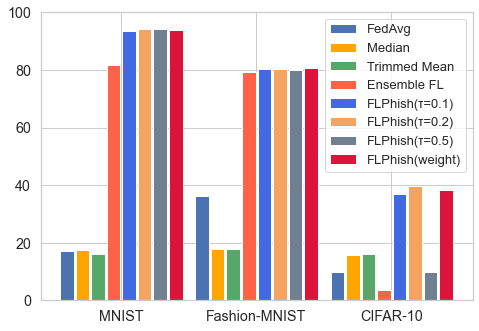

In [192]:
bar_plot('random', 'byzantines')

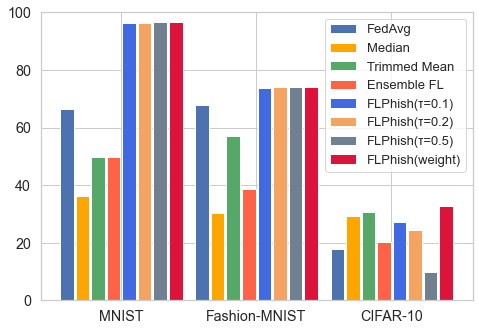

In [193]:

bar_plot('untargeted', 'imbalances')

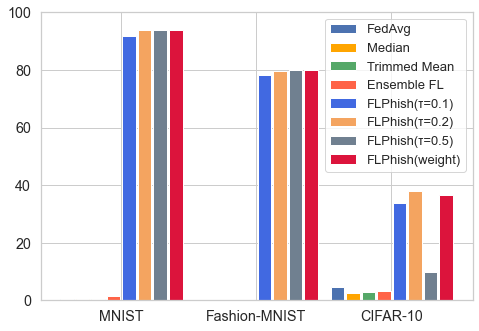

In [194]:

bar_plot('untargeted', 'byzantines')